In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

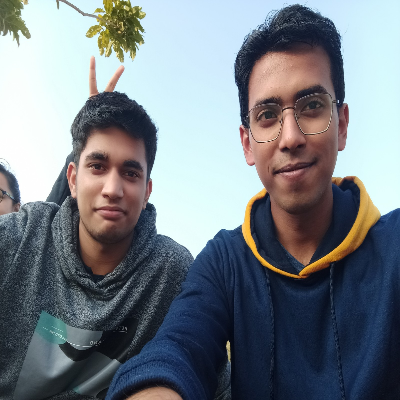

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Face Detection data/harsh/IMG_20211206_153006.jpg')
img=cv2.resize(img,(400,400))
cv2_imshow(img)

In [ ]:
haarcascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
detect=haarcascade.detectMultiScale(gray,1.1,8)

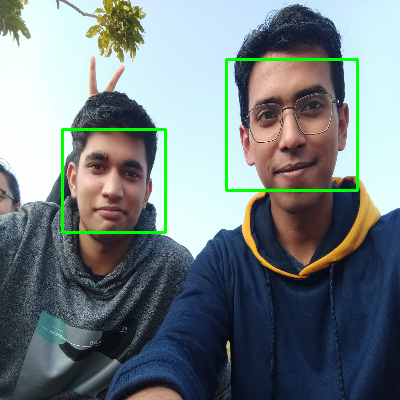

In [ ]:
for i,(x,y,w,h) in enumerate(detect):
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  cropped=img[y:y+h,x:x+w]
  cv2.imwrite(f'/content/image{i}.jpg',cropped)
cv2_imshow(img)

In [2]:
'/content/haarcascade_frontalface_default.xml'.split('.')[0]

'/content/haarcascade_frontalface_default'

In [ ]:
haar_cascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
for files in os.listdir('/content/drive/MyDrive/Face Detection data/gaurto_exta'):
  img=cv2.imread("/content/drive/MyDrive/Face Detection data/to_ext"+'/'+files)
  # img=cv2.resize(img,(400,400))
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  detected=haar_cascade.detectMultiScale(gray,1.1,8)
  for i,(x,y,w,h) in enumerate(detected):
    cv2.imwrite(f"/content/drive/MyDrive/Face Detection data/exted/{files.split('.')[0]}_{i}.jpg",img[y:y+h,x:x+h])
    print(f'{files.split(".")[0]}_{i}.jpg done')


IMG_20221206_101623_0.jpg done
IMG_20221206_101623_1.jpg done
IMG_20230307_134310_0.jpg done
IMG_20230307_134310_1.jpg done
IMG_20230307_134310_2.jpg done
IMG_20230307_134312_0.jpg done
IMG_20230307_134312_1.jpg done
IMG_20230307_134312_2.jpg done
IMG_20230307_134312_3.jpg done
IMG_20221206_101210_0.jpg done
IMG_20221206_101210_1.jpg done
IMG_20220909_112245_0.jpg done
IMG_20220909_112245_1.jpg done
IMG_20221206_101206_0.jpg done
IMG_20221206_101206_1.jpg done
IMG_20221206_101206_2.jpg done
IMG_20221206_101206_3.jpg done
IMG_20220601_124639_0.jpg done
IMG_20220601_124639_1.jpg done
IMG_20220601_124639_2.jpg done
IMG_20220601_124639_3.jpg done
IMG_20220601_124641_0.jpg done
IMG_20220601_124641_1.jpg done
IMG_20220601_124641_2.jpg done
IMG_20220601_124641_3.jpg done
IMG_20220601_124641_4.jpg done
IMG_20220224_130137_0.jpg done
IMG_20220224_130137_1.jpg done
IMG_20220224_130137_2.jpg done
IMG_20220224_130137_3.jpg done
IMG_20221206_101211_0.jpg done
IMG_20221206_101211_1.jpg done
IMG_2022

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_generator=ImageDataGenerator(
    rescale=1./255,   #normalization of data
    rotation_range=40,   #augmentation of data
    height_shift_range=0.5,
    vertical_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

train_iterator=train_generator.flow_from_directory('/content/drive/MyDrive/Face Detection data',target_size=(160,160),batch_size=32,class_mode='categorical')

Found 596 images belonging to 8 classes.


In [5]:
validation_generator=ImageDataGenerator(
    rescale=1./255,
)

validation_iterator=train_generator.flow_from_directory('/content/drive/MyDrive/Face Detection data',target_size=(160,160),batch_size=32,class_mode='categorical')

Found 596 images belonging to 8 classes.


In [6]:
validation_iterator.class_indices

{'gaurav': 0,
 'harsh': 1,
 'harshit': 2,
 'mayank': 3,
 'nitin': 4,
 'shivam': 5,
 'shourya': 6,
 'vineet': 7}

In [7]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.layers import Input, Lambda, GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

In [8]:

mobilenet = MobileNetV2(input_shape = (160,160,3), include_top = False,weights='imagenet')
mobilenet.trainable=False
after_mobilenet = Sequential([GlobalAveragePooling2D(),
                              Dense(512,activation='relu'),
                             Dropout(0.2),
                             Dense(8, activation = 'softmax')])

model2 = Sequential([mobilenet, after_mobilenet])
import keras
model2.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 sequential (Sequential)     (None, 8)                 659976    
                                                                 
Total params: 2,917,960
Trainable params: 659,976
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
epochs = 10
steps_per_epoch = 70
validation_steps = 70

history = model2.fit(train_iterator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_iterator,
                              validation_steps=validation_steps)

Epoch 1/10
70/70 [==============================] - 116s 1s/step - loss: 1.5986 - accuracy: 0.4428 - val_loss: 1.1861 - val_accuracy: 0.6311
Epoch 2/10
70/70 [==============================] - 46s 648ms/step - loss: 1.1187 - accuracy: 0.6182 - val_loss: 0.9272 - val_accuracy: 0.6933
Epoch 3/10
70/70 [==============================] - 67s 958ms/step - loss: 0.9281 - accuracy: 0.6919 - val_loss: 0.7598 - val_accuracy: 0.7691
Epoch 4/10
70/70 [==============================] - 65s 924ms/step - loss: 0.8098 - accuracy: 0.7381 - val_loss: 0.6642 - val_accuracy: 0.7985
Epoch 5/10
70/70 [==============================] - 63s 889ms/step - loss: 0.6925 - accuracy: 0.7792 - val_loss: 0.5967 - val_accuracy: 0.8303
Epoch 6/10
70/70 [==============================] - 46s 658ms/step - loss: 0.6234 - accuracy: 0.8134 - val_loss: 0.5396 - val_accuracy: 0.8430
Epoch 7/10
70/70 [==============================] - 66s 944ms/step - loss: 0.5636 - accuracy: 0.8216 - val_loss: 0.4671 - val_accuracy: 0.8784
E

In [11]:
epochs = 10
steps_per_epoch = 70
validation_steps = 70

history = model2.fit(train_iterator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_iterator,
                              validation_steps=validation_steps)

Epoch 1/10
70/70 [==============================] - 45s 638ms/step - loss: 0.4208 - accuracy: 0.8761 - val_loss: 0.3375 - val_accuracy: 0.9070
Epoch 2/10
70/70 [==============================] - 64s 912ms/step - loss: 0.4009 - accuracy: 0.8716 - val_loss: 0.3213 - val_accuracy: 0.9152
Epoch 3/10
70/70 [==============================] - 45s 642ms/step - loss: 0.3964 - accuracy: 0.8759 - val_loss: 0.3112 - val_accuracy: 0.9093
Epoch 4/10
70/70 [==============================] - 47s 660ms/step - loss: 0.3555 - accuracy: 0.8809 - val_loss: 0.3154 - val_accuracy: 0.9070
Epoch 5/10
70/70 [==============================] - 67s 924ms/step - loss: 0.3379 - accuracy: 0.8937 - val_loss: 0.2796 - val_accuracy: 0.9183
Epoch 6/10
70/70 [==============================] - 64s 916ms/step - loss: 0.3096 - accuracy: 0.9028 - val_loss: 0.2753 - val_accuracy: 0.9251
Epoch 7/10
70/70 [==============================] - 47s 661ms/step - loss: 0.3100 - accuracy: 0.9047 - val_loss: 0.2576 - val_accuracy: 0.9292

In [12]:
epochs = 10
steps_per_epoch = 70
validation_steps = 70

history = model2.fit(train_iterator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_iterator,
                              validation_steps=validation_steps)

Epoch 1/10
70/70 [==============================] - 48s 678ms/step - loss: 0.2641 - accuracy: 0.9156 - val_loss: 0.2107 - val_accuracy: 0.9387
Epoch 2/10
70/70 [==============================] - 64s 919ms/step - loss: 0.2378 - accuracy: 0.9334 - val_loss: 0.2194 - val_accuracy: 0.9360
Epoch 3/10
70/70 [==============================] - 48s 674ms/step - loss: 0.2435 - accuracy: 0.9261 - val_loss: 0.2007 - val_accuracy: 0.9469
Epoch 4/10
70/70 [==============================] - 64s 907ms/step - loss: 0.2478 - accuracy: 0.9220 - val_loss: 0.1796 - val_accuracy: 0.9510
Epoch 5/10
70/70 [==============================] - 46s 660ms/step - loss: 0.2170 - accuracy: 0.9275 - val_loss: 0.2024 - val_accuracy: 0.9365
Epoch 6/10
70/70 [==============================] - 48s 674ms/step - loss: 0.2261 - accuracy: 0.9319 - val_loss: 0.1996 - val_accuracy: 0.9428
Epoch 7/10
70/70 [==============================] - 48s 680ms/step - loss: 0.2381 - accuracy: 0.9220 - val_loss: 0.1806 - val_accuracy: 0.9505

In [16]:
epochs = 10
steps_per_epoch = 70
validation_steps = 70

history = model2.fit(train_iterator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_iterator,
                              validation_steps=validation_steps)

Epoch 1/10
70/70 [==============================] - 46s 649ms/step - loss: 0.1895 - accuracy: 0.9366 - val_loss: 0.1571 - val_accuracy: 0.9592
Epoch 2/10
70/70 [==============================] - 49s 694ms/step - loss: 0.1794 - accuracy: 0.9443 - val_loss: 0.1515 - val_accuracy: 0.9614
Epoch 3/10
70/70 [==============================] - 45s 640ms/step - loss: 0.1825 - accuracy: 0.9434 - val_loss: 0.1600 - val_accuracy: 0.9533
Epoch 4/10
70/70 [==============================] - 44s 630ms/step - loss: 0.1806 - accuracy: 0.9453 - val_loss: 0.1291 - val_accuracy: 0.9673
Epoch 5/10
70/70 [==============================] - 63s 895ms/step - loss: 0.1617 - accuracy: 0.9507 - val_loss: 0.1322 - val_accuracy: 0.9651
Epoch 6/10
70/70 [==============================] - 44s 618ms/step - loss: 0.1704 - accuracy: 0.9505 - val_loss: 0.1398 - val_accuracy: 0.9596


KeyboardInterrupt: ignored

In [13]:
from keras.models import Sequential, model_from_json
import json

In [17]:
model_json=model2.to_json()
with open("FDmodel3.json", "w") as json_file:
    json_file.write(model_json)
model2.save_weights('FDmodel3.h5')

In [ ]:
with open('model.json','r') as f:
  json_model=f.read()
loaded_model=model_from_json(json_model)
loaded_mode.load_weights('model.h5')

loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])